In [1]:
# imports
import io
import seaborn as sns
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [56]:
# Import the CSVs to Pandas DataFrames

#Google Mobility Data
google = Path("C:/Users/elija/FinTech_UofT/8-Project1/Project1/Global_Mobility_Report.csv")
df = pd.read_csv(google, parse_dates=True, infer_datetime_format=True)

# Apple Mobility Data
apple = Path("C:/Users/elija/FinTech_UofT/8-Project1/Project1/applemobilitytrends-2021-06-24.csv")
df2 = pd.read_csv(apple)
df2 = df2.set_index(['region','transportation_type']).transpose()
df2.drop(df2.index[:4], inplace=True)
df2.index = pd.to_datetime(df2.index)
df2.bfill(inplace=True)
apple_df = df2

In [57]:
# Rename Columns in dataframe
df_tidy = df.rename(columns = {'country_region': 'Country', 'retail_and_recreation_percent_change_from_baseline': 'Retail and Recreation', 
                               'grocery_and_pharmacy_percent_change_from_baseline': 'Grocery and Pharmacy', 
                               'parks_percent_change_from_baseline': 'Parks', 'transit_stations_percent_change_from_baseline': 
                               'Transit Stations', 'workplaces_percent_change_from_baseline': 'Workplaces', 
                               'residential_percent_change_from_baseline': 'Residential'}, inplace = False)

# Create a list and query of countries for analysis
list_countries = ['Brazil', 'Canada', 'France','Germany', 'India', 'Italy', 'Japan', 'United States', 'United Kingdom']
countries = df_tidy.query('Country in @list_countries')

countries.tail()

country_region_code        Country sub_region_1   sub_region_2  \
5812037                  US  United States      Wyoming  Weston County   
5812038                  US  United States      Wyoming  Weston County   
5812039                  US  United States      Wyoming  Weston County   
5812040                  US  United States      Wyoming  Weston County   
5812041                  US  United States      Wyoming  Weston County   

        metro_area iso_3166_2_code  census_fips_code  \
5812037        NaN             NaN           56045.0   
5812038        NaN             NaN           56045.0   
5812039        NaN             NaN           56045.0   
5812040        NaN             NaN           56045.0   
5812041        NaN             NaN           56045.0   

                            place_id        date  Retail and Recreation  \
5812037  ChIJd4Rqhed3YocR7ubT5-HgoJg  2021-06-16                    NaN   
5812038  ChIJd4Rqhed3YocR7ubT5-HgoJg  2021-06-17                    NaN   
5812039  ChIJd4Rqhed3YocR7ubT5-HgoJg  2021-06-18                    NaN   
5812040  ChIJd4Rqhed3YocR7ubT5-HgoJg  2021-06-21                    NaN   
5812041  ChIJd4Rqhed3YocR7ubT5-HgoJg  2021-06-22                    NaN   

         Grocery and Pharmacy  Parks  Transit Stations  Workplaces  \
5812037                   NaN    NaN               NaN       -39.0   
5812038                   NaN    NaN               NaN       -39.0   
5812039                   NaN    NaN               NaN       -31.0   
5812040                   NaN    NaN               NaN       -38.0   
5812041                   NaN    NaN               NaN       -36.0   

         Residential  
5812037          NaN  
5812038          NaN  
5812039          NaN  
5812040          NaN  
5812041          NaN

In [58]:
# Median Increase in Residential Activities
def residential_median(data, title, xlabel, ylabel, color):
    """
    Residential Activities
    """
    
    fig = plt.figure()
    sns.distplot(data[ylabel]) 
    plt.title(title +str(np.nanmedian(df_tidy[ylabel])))
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    
    plt.close()
    return pn.pane.Matplotlib(fig, tight=True)

# Percentage Change in Retail, Recreation, Workplaces and Transit Stations
def change_in_mobility(data, title, xlabel, ylabel1, ylabel2, ylabel3, ylabel4, ylabel5, ylabel6):
    """
    2020 to 2021 Mobility: Percentage Change
    """
    fig ,axes = plt.subplots(4, 1, sharex=True, sharey=False)
    figure_data = data[data[ylabel1].isnull()][[ylabel2,ylabel3,ylabel4,ylabel5,ylabel6]].groupby(ylabel2).rolling(7).mean().groupby(ylabel2).last().sort_values(by=ylabel3)
   
    Retail =sns.barplot(ax=axes[0], x=figure_data.index, y=figure_data['Retail and Recreation'])
    axes[0].set_title('Retail and Recreation')
    Retail.set(xlabel=None)
    Retail.set(ylabel=None)
    
    
    Workplaces= sns.barplot(ax=axes[1], x=figure_data.index, y=figure_data['Workplaces'])
    axes[1].set_title('Workplaces')
    Workplaces.set(xlabel=None)
    Workplaces.set(ylabel=None)
    

    Transit=sns.barplot(ax=axes[2], x=figure_data.index, y=figure_data['Transit Stations'])
    axes[2].set_title('Transit Stations')
    Transit.set(xlabel=None)
    Transit.set(ylabel=None)
    
    Grocery=sns.barplot(ax=axes[3], x=figure_data.index, y=figure_data['Grocery and Pharmacy'])
    axes[3].set_title('Grocery and Pharmacy')
    Grocery.set(xlabel=None)
    Grocery.set(ylabel=None)
    
    plt.close()
    return pn.pane.Matplotlib(fig,tight=True)

# Apple Commute
def change_in_commute(data, ylabel):
    "Changes in Day to Day Commute"
    
    fig = plt.figure()
    sns.lineplot(data=data[[ylabel]].loc[:,(slice(None),'driving')].rolling(7).mean())
    
    plt.close()
    return pn.pane.Matplotlib(fig, tight=True)



In [59]:
# Line chart function to be added to pn.pane function
Canada = change_in_commute(apple_df, 'Canada')
UK = change_in_commute(apple_df, 'United Kingdom')
Italy = change_in_commute(apple_df, 'Italy')
Japan = change_in_commute(apple_df, 'Japan')
India = change_in_commute(apple_df, 'India')
Brazil = change_in_commute(apple_df, 'Brazil')
Germany = change_in_commute(apple_df, 'Germany')
France = change_in_commute(apple_df, 'France')
US = change_in_commute(apple_df, 'United States')

countries_1 = pn.Row(Brazil, Canada)
countries_2 = pn.Row(France, Germany)
countries_3 = pn.Row(India, Italy)
countries_4 = pn.Row(Japan, UK)
countries_5 = pn.Row(US)

countries_12 = pn.Column(countries_1, countries_2)
countries_34 = pn.Column(countries_3, countries_4)


In [60]:
title = pn.pane.Markdown("""---""", width = 800)

tabs = pn.Tabs(
        #First Tab
        ("Median Percentage Increase in Residential Areas", 
         pn.Column(residential_median(countries, 'Median Percentage Increase in Residential Areas : ', 
                                      'Median Values', 'Residential', 'blue'))),
    
        #Second Tab
        ("Mobility Changes", pn.Column(change_in_mobility(countries, 'Mobility : Percentage Change', 'Countries', 'sub_region_1', 'Country', 'Retail and Recreation', 'Workplaces','Transit Stations', 'Grocery and Pharmacy'))),

        #Third Tab
        ("7 Days Rolling Averages of Driving in Brazil, Canada, France and Germany", countries_12),
    
        #Fourth Tab
        ("7 Days Rolling Averages of Driving in India, Italy, Japan and UK", countries_34),
    
        #Fifth Tab
        ("7 Days Rolling Averages of Driving in the US", pn.Column(change_in_commute(apple_df, 'United States'))))

# Dashboard
dashboard = pn.Column(
    pn.Row(title),
    tabs, 
    width=1024,
    height=768
)

Column(height=768, sizing_mode='fixed', width=1024)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Matplotlib(Figure, tight=True)
        [1] Column
            [0] Matplotlib(Figure, tight=True)
        [2] Column
            [0] Row
                [0] Matplotlib(Figure, tight=True)
                [1] Matplotlib(Figure, tight=True)
            [1] Row
                [0] Matplotlib(Figure, tight=True)
                [1] Matplotlib(Figure, tight=True)
        [3] Column
            [0] Row
                [0] Matplotlib(Figure, tight=True)
                [1] Matplotlib(Figure, tight=True)
            [1] Row
                [0] Matplotlib(Figure, tight=True)
                [1] Matplotlib(Figure, tight=True)
        [4] Column
            [0] Matplotlib(Figure, tight=True)
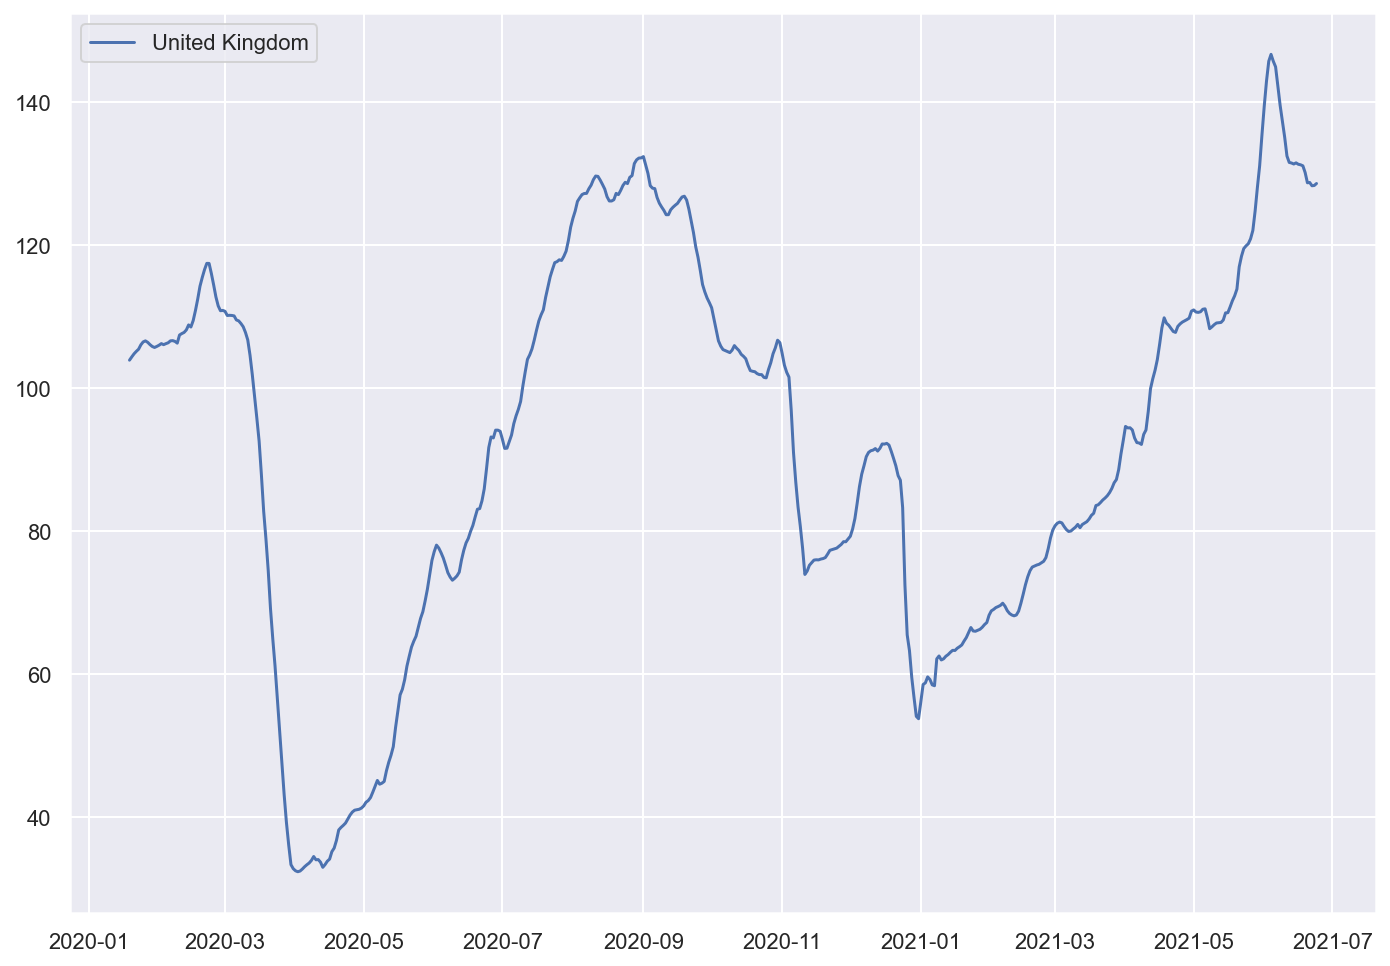
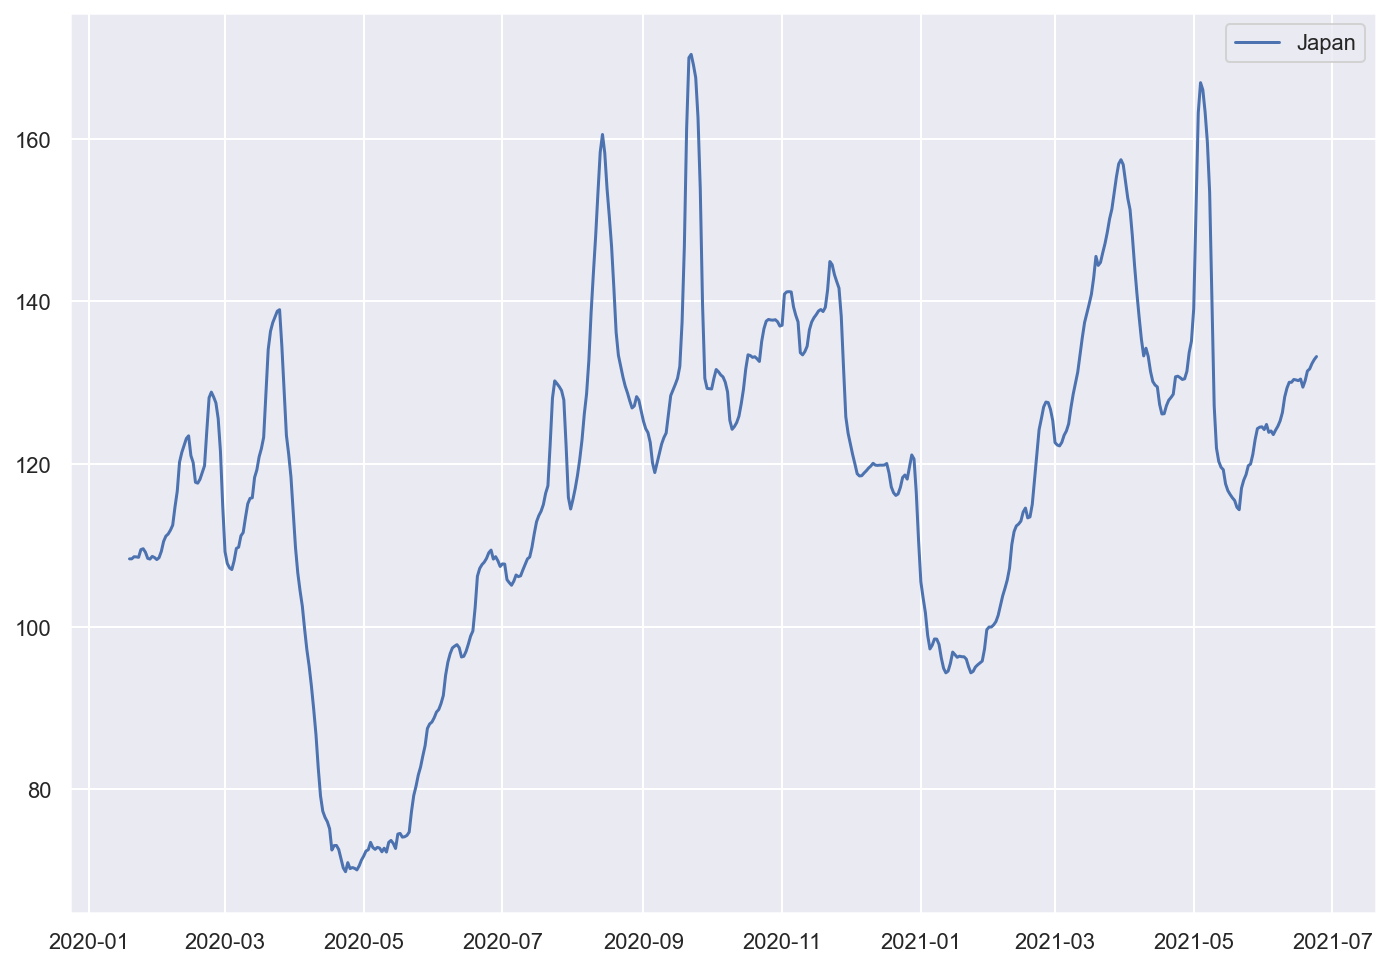
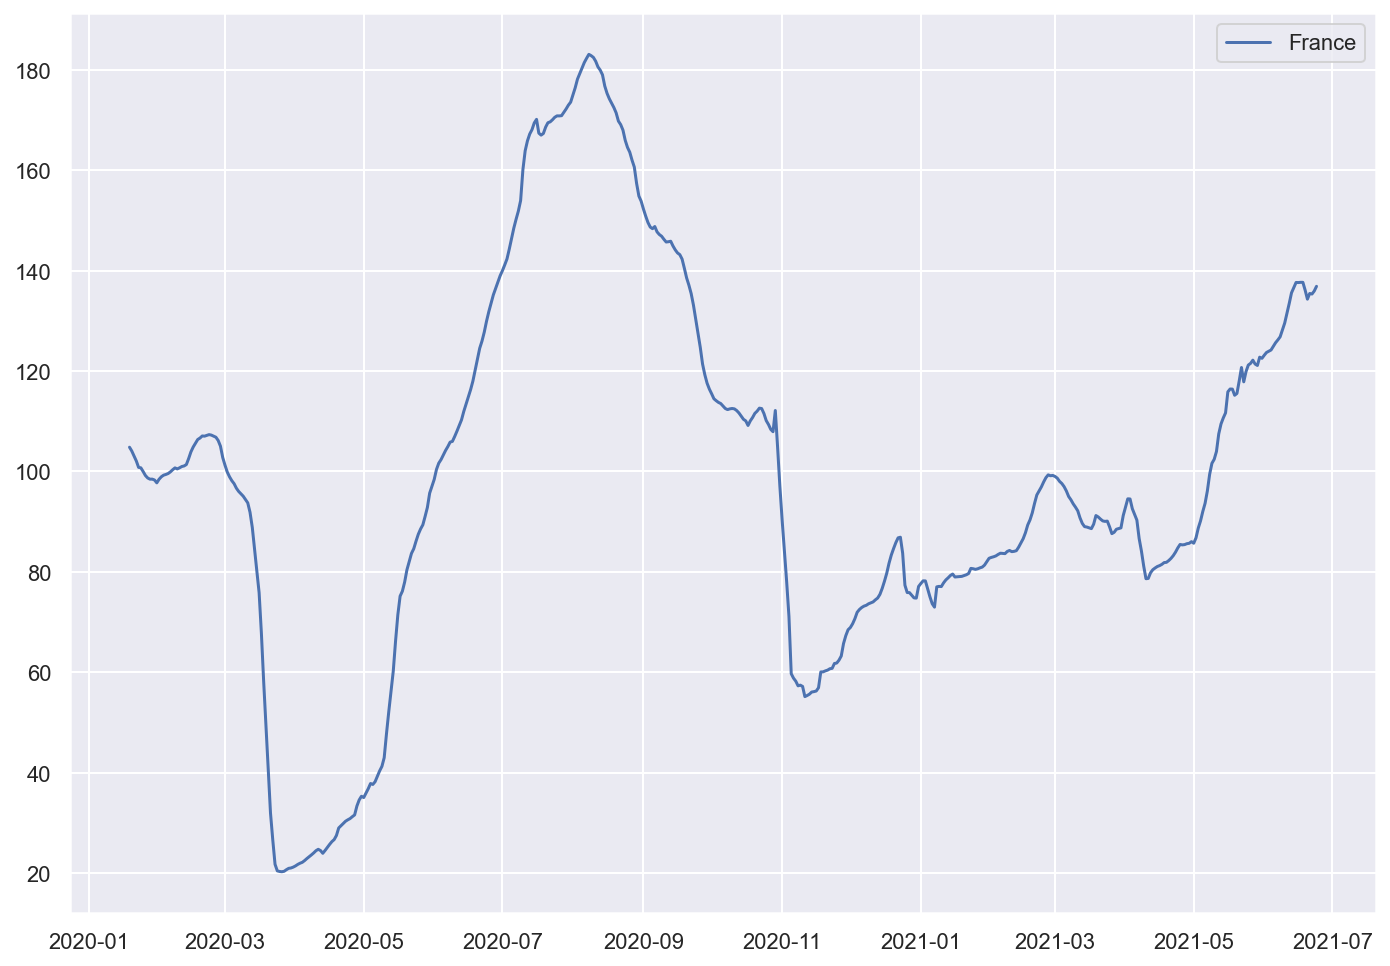
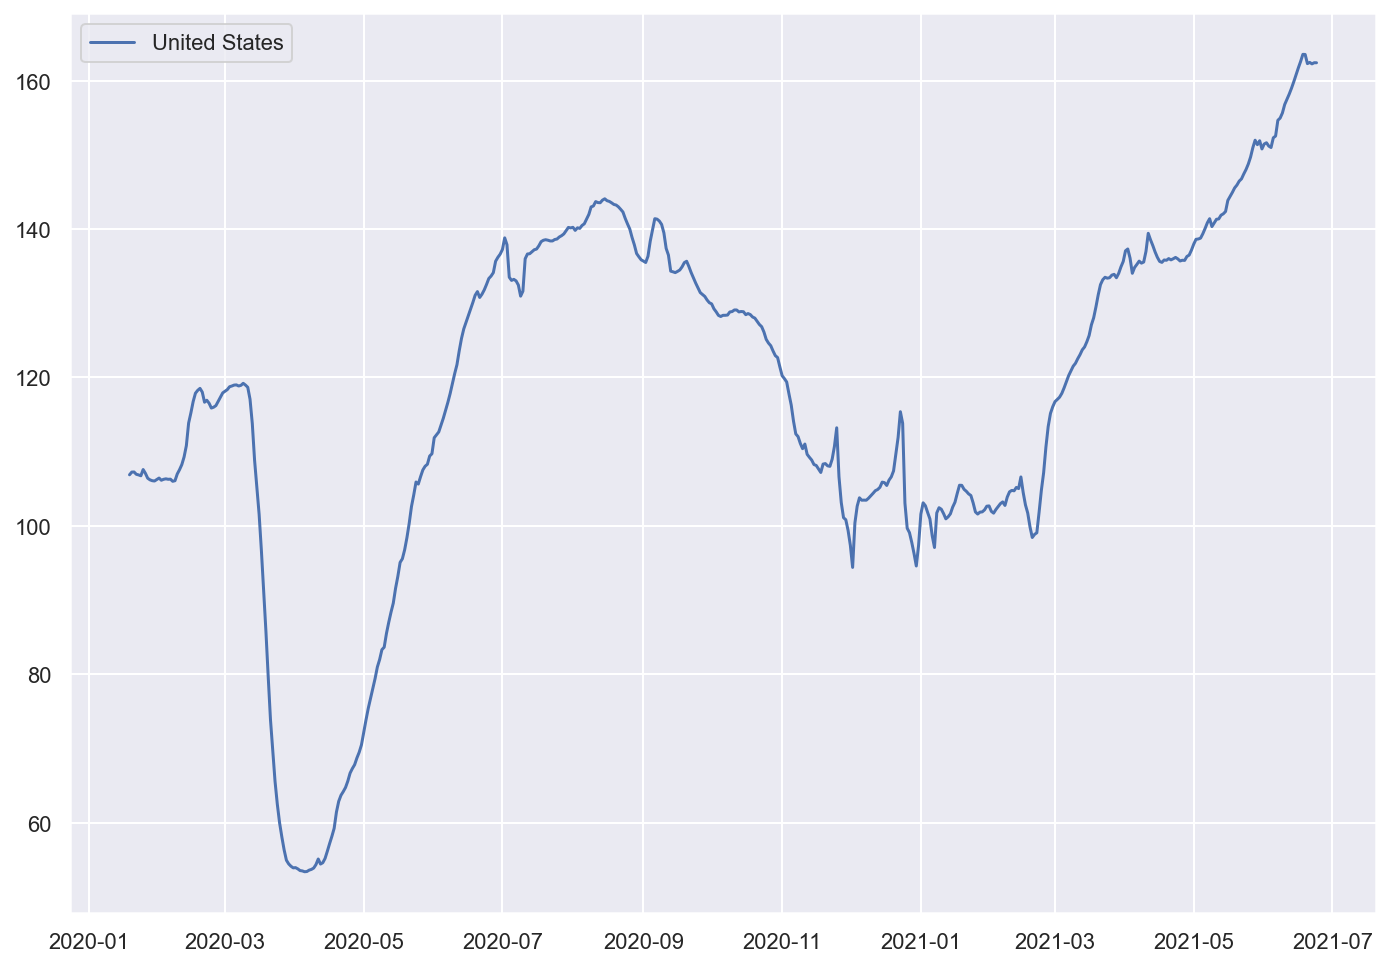
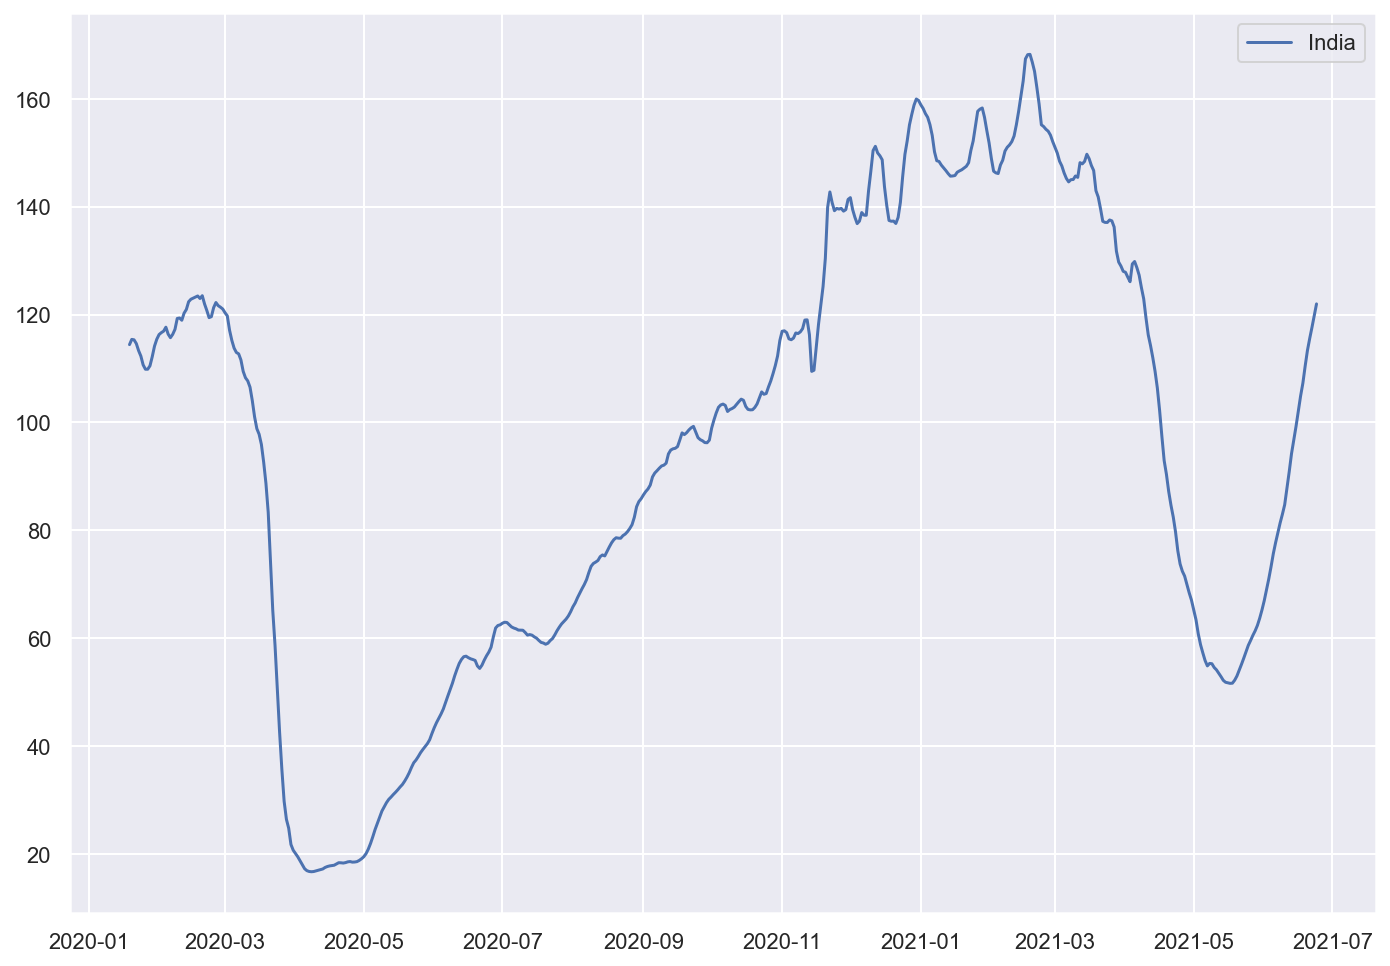
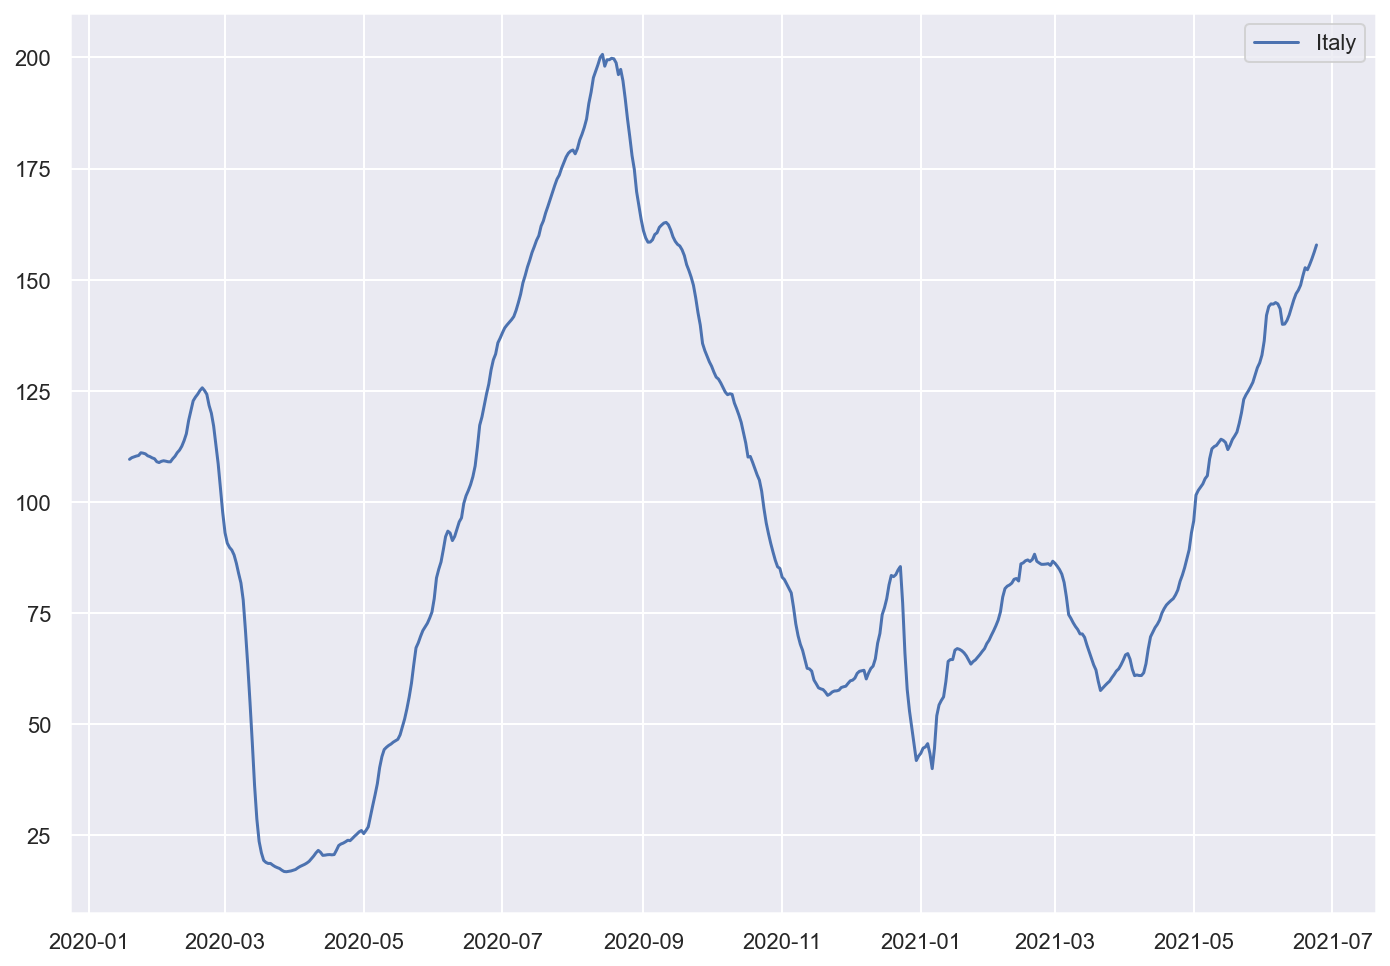
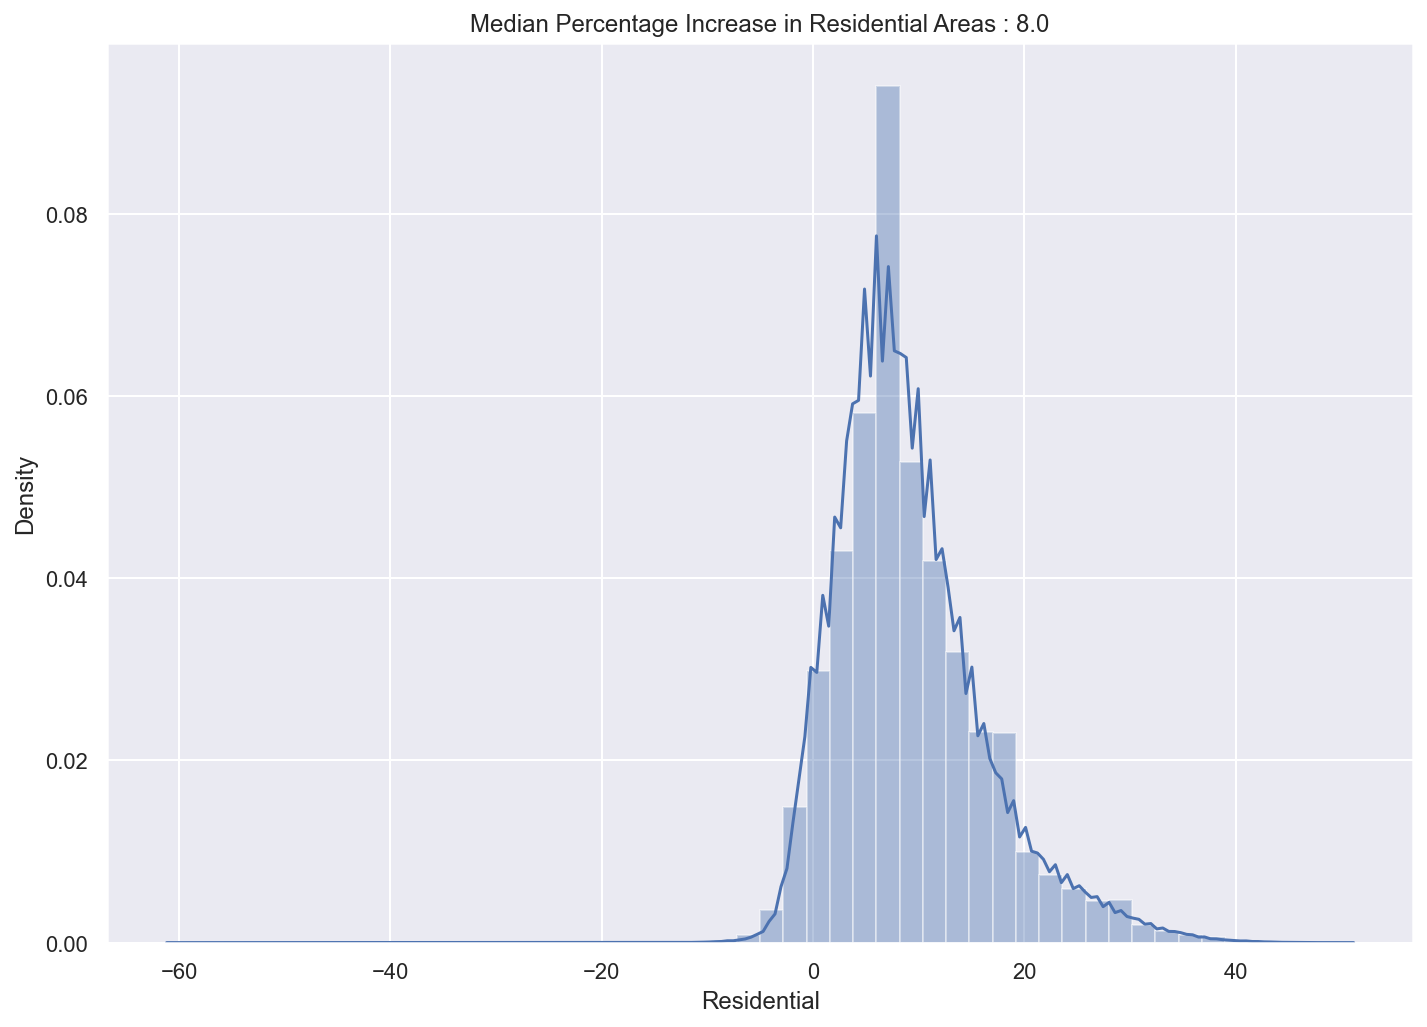
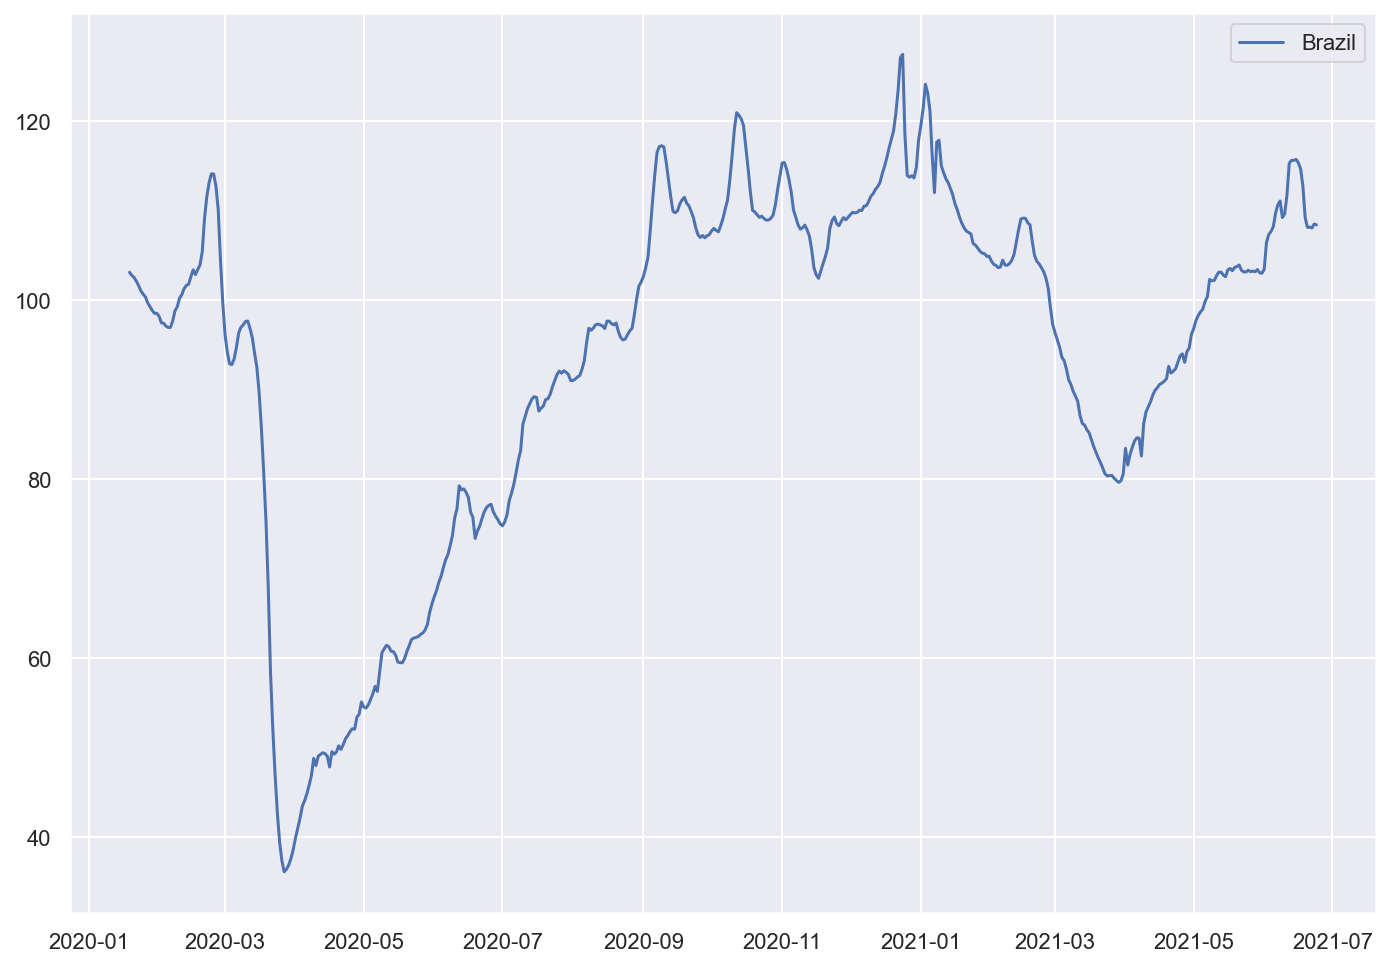
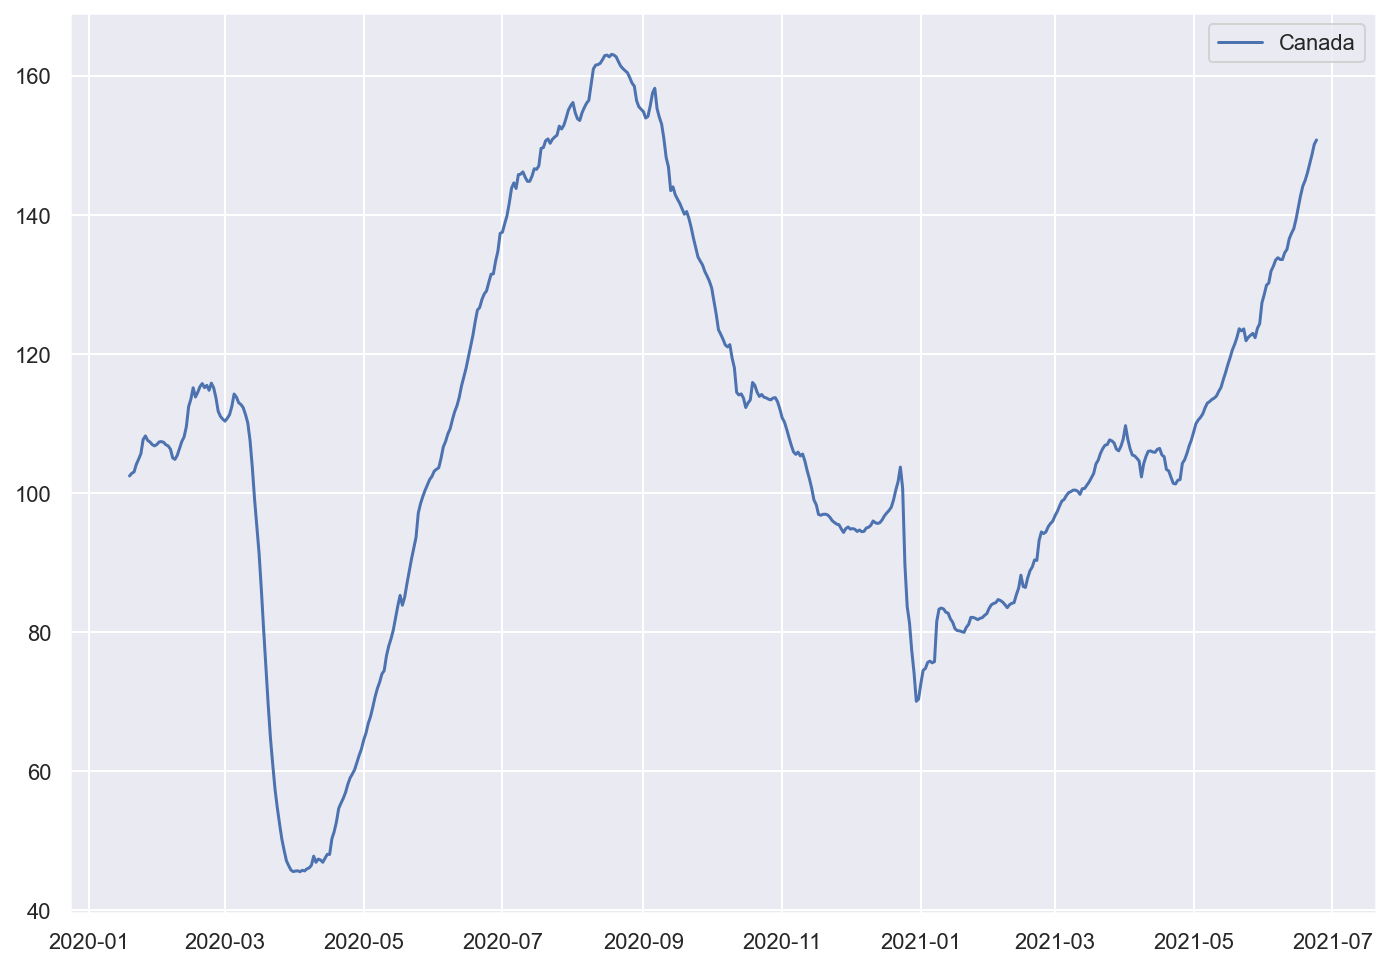
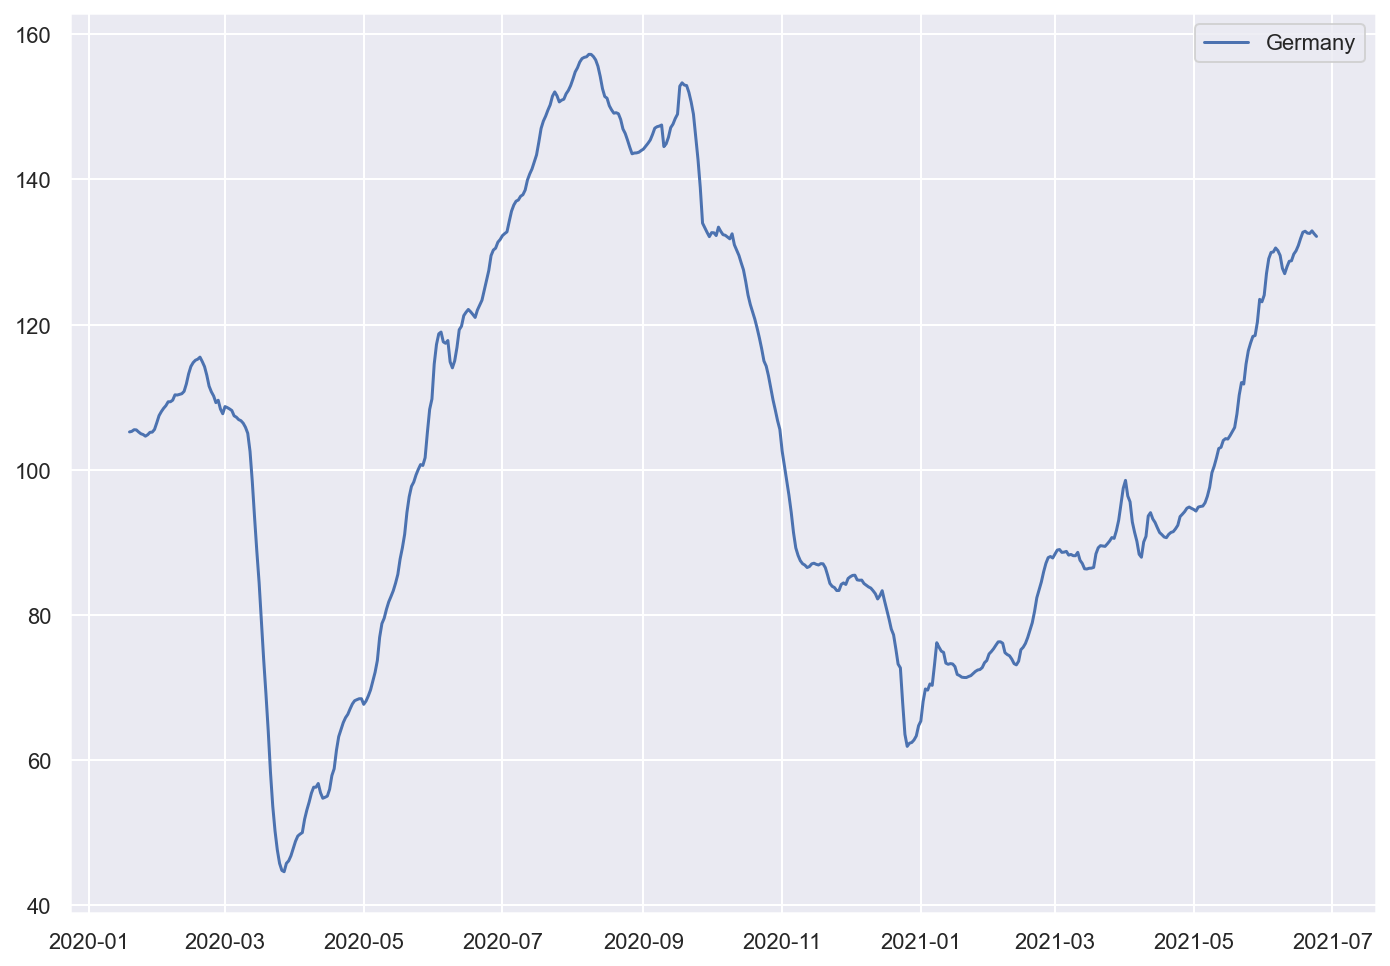
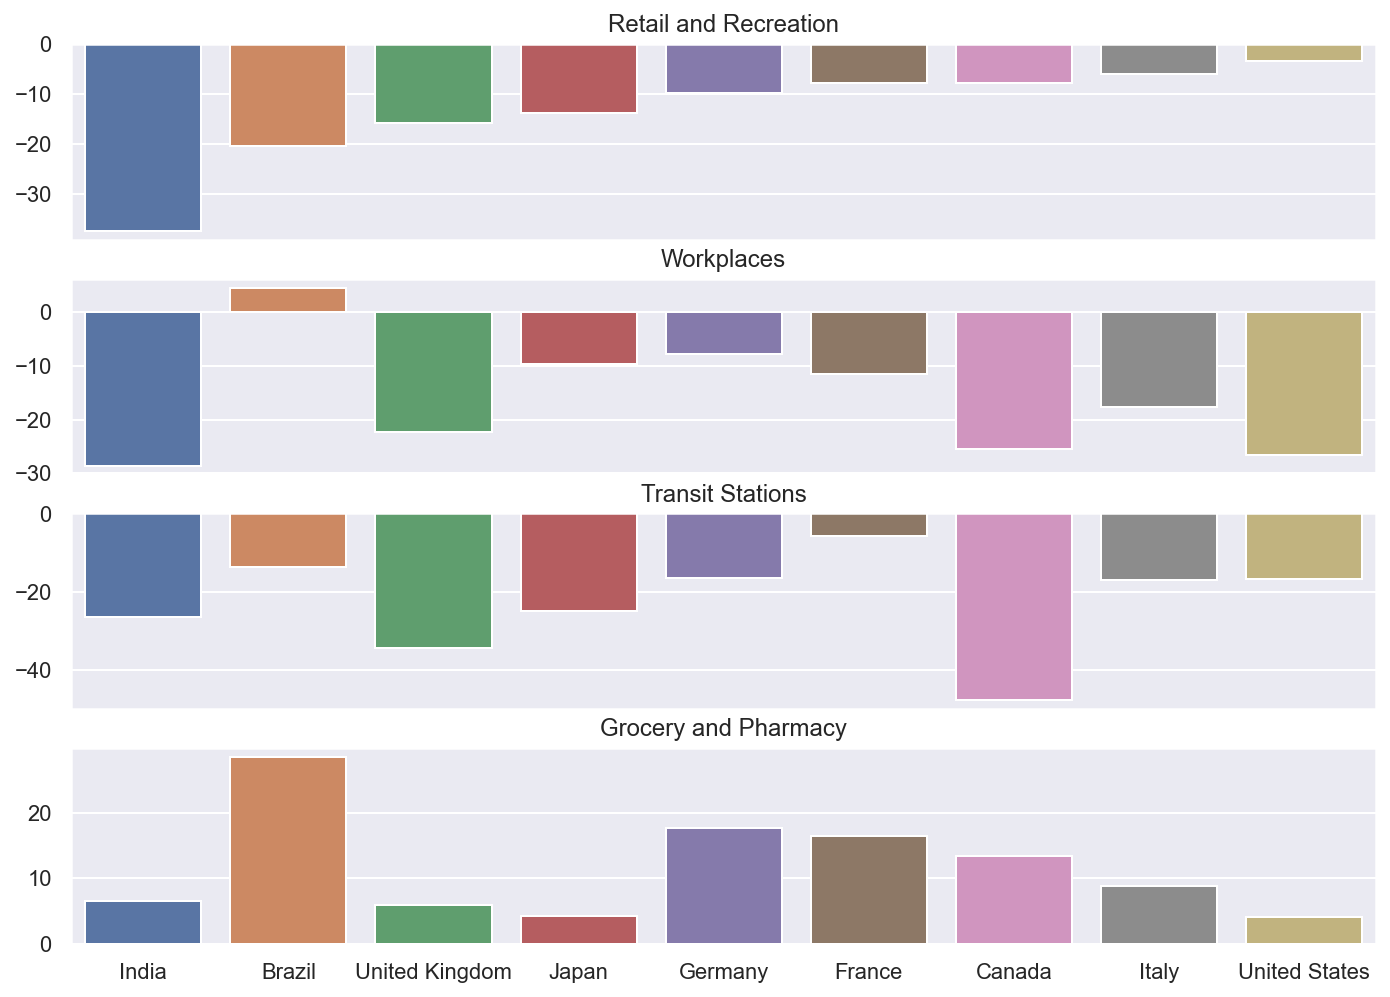

In [61]:
dashboard.servable()